In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [36]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import ssl
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ssl._create_default_https_context = ssl._create_unverified_context

<IPython.core.display.Javascript object>

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [37]:
lager = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv"
)
lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


<IPython.core.display.Javascript object>

We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [38]:
lager = lager.drop(columns=["beer"])

<IPython.core.display.Javascript object>

Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [41]:
X = lager.drop(columns=["tpc"])
y = lager["tpc"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=69420
)

<IPython.core.display.Javascript object>

Next, we'll generate a linear model and plot the residual vs. fit plot.

What are the coefficients, and what are their significance?

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

print(model.intercept_, "\n")
print(model.coef_)

28.13610532804796 

[  0.95856562 132.49998945  -2.60503731  -1.07425658  66.24061553
   0.32020673]


<IPython.core.display.Javascript object>

In [33]:
cols = list(lager.columns.drop("tpc"))

<IPython.core.display.Javascript object>

In [47]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_train)

<IPython.core.display.Javascript object>

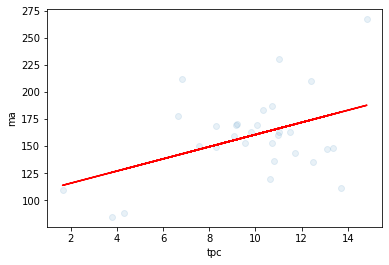

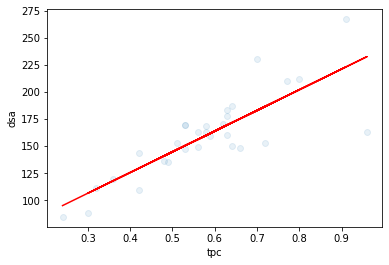

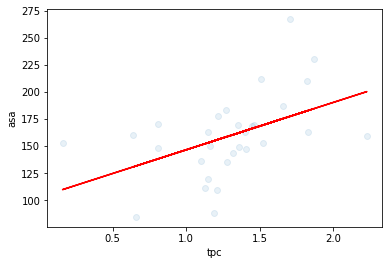

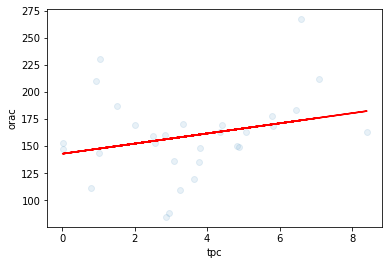

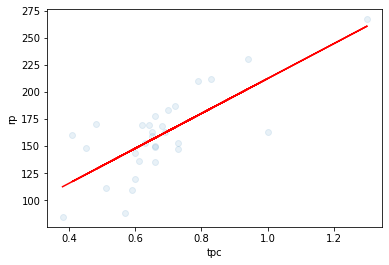

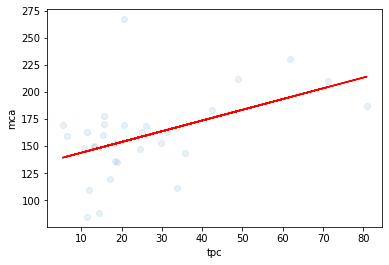

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tpc   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     8.371
Date:                Mon, 06 Apr 2020   Prob (F-statistic):            0.00730
Time:                        14:51:01   Log-Likelihood:                -147.69
No. Observations:                  30   AIC:                             299.4
Df Residuals:                      28   BIC:                             302.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.0310     10.816     12.392      0.000     111.875     156.187
mca            0.9917      0.343      2.893      0.007       0.290       1.694
==============================================================================
Omnibus:                        9.909   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.537
Skew:                           0.758   Prob(JB):                      0.00312
Kurtosis:                       5.633   Cond. No.                         54.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

In [49]:
for elem in cols:
    X = lager[elem]
    y = lager["tpc"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=69420
    )

    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_train)

    lm_results = sm.OLS(y_train, X_train_const).fit()
    y_pred = lm_results.predict(X_train_const)

    plt.scatter(X_train, y_train, alpha=0.1)
    plt.plot(X_train, y_pred, c="red")
    plt.xlabel("tpc")
    plt.ylabel(elem)
    plt.show()

lm_results.summary()

In [50]:
X = lager["ma"]
y = lager["tpc"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=69420
)

<IPython.core.display.Javascript object>

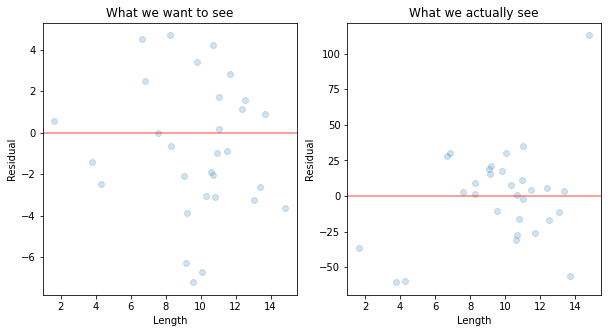

<IPython.core.display.Javascript object>

In [51]:
true_residuals = lm_results.resid
rand_norm_residuals = np.random.normal(0, 3, len(y_train))


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(X_train, rand_norm_residuals, alpha=0.2)
axes[0].axhline(0, c="red", alpha=0.5)
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Residual")
axes[0].set_title("What we want to see")

axes[1].scatter(X_train, true_residuals, alpha=0.2)
axes[1].axhline(0, c="red", alpha=0.5)
axes[1].set_xlabel("Length")
axes[1].set_ylabel("Residual")
axes[1].set_title("What we actually see")
plt.show()

Compute the VIF for all features in the model

In [0]:
# answer below:



Plot the qq-plot for our errors (make sure to standardize the errors to compare to the standard normal distribtion):

In [0]:
# answer below:

